<a href="https://colab.research.google.com/github/Aleksandra-Shukova/OpenCV2/blob/main/OpenCV_pz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#add google drive to colab
from google.colab import drive
drive.mount('/gdrive') #name could be anything

#set working folder
%cd /gdrive/My Drive/Colab Notebooks/Ai learning/OpenCV practice 2

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/Ai learning/OpenCV practice 2


In [ ]:
import cv2
import matplotlib.pyplot as plt

import numpy as np

#cv2.imshow("Frame", frame)
#disabled in google colab so we import another function:
from google.colab.patches import cv2_imshow
#cv2_imshow(frame)
#it draws one frame, just like print('text')
#to not die under ton of screenshots
from google.colab import output
#output.clear()
#will delete picture before draw a new one
#to give programm time to draw a picture
import time
#time.sleep(1) to sleep for 1 sec
#but apparently cv2 has a function
#.waitKey() that used as delay
#it is lagging more,
#so i took more casual approach time.sleep()

In [ ]:
def plot_dataset(features, labels, W=None, b=None):
    # prepare the plot
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:,1])
        min_y = min(features[:,1])*(1-.1)
        max_y = max(features[:,1])*(1+.1)
        cx = np.array([min_x,max_x],dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

In [ ]:
import tensorflow as tf
import numpy as np
def my_get_coefs(X, Y):
    train_x = np.array( X )
    train_labels = np.array( Y )
    inputs = tf.keras.Input(shape=(2,))
    z = tf.keras.layers.Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid')(inputs)
    model = tf.keras.models.Model(inputs,z)

    train_x_norm = train_x-np.min(train_x) / (np.max(train_x)-np.min(train_x))

    model.compile(tf.keras.optimizers.Adam(0.001),'binary_crossentropy',['accuracy'])
    #model.summary()
    acc = 0
    acc0 = 0
    for i in range(10):
        h = model.fit(train_x_norm,train_labels,batch_size=8,epochs=10)
        _, acc = model.evaluate(train_x, train_labels)
        print("i = ",i)
        '''if acc-acc0 < .01 :
            break
        else: acc0=acc'''
        if acc > 0.98: break
    W = model.weights[0]
    b = model.weights[1]
    #plot_dataset(train_x,train_labels,W.numpy(),b.numpy())
    print("my acc = ", acc)
    #print("previous acc = ", acc0)
    return W.numpy(), b.numpy()
#print( X,Y )

#myW, myb = my_get_coefs(X,Y)

#plot_dataset(X,Y,myW,myb)

In [ ]:

#for easy result showing
def myShow(xFrame):
    '''shows video frame by frame'''
    #output.clear()
    cv2_imshow(xFrame)
    time.sleep(0.05)
    #cv2.waitKey(50) # 33 мс сон (~30 кадров в секунду)

In [ ]:
def my_cv2_threshold(img_in_color,
                     ground_color_BGR = np.array([0,200,50]),
                     sky_color_BGR = np.array([220,100,100]) ):
    #len between colors
    def myDistance( a, b ):
        p1 = np.array(a)
        p2 = np.array(b)
        return np.linalg.norm(p1-p2)
    white_color_BGR = np.array([250,200,200])
    black_color_BGR = np.array([0,0,100])
    #func
    buff_img = np.zeros( img_in_color.shape )
    for i in range( img_in_color.shape[0] ):
        for j in range( img_in_color.shape[1] ):
            d2ground = myDistance( img_in_color[i,j], ground_color_BGR )
            d2sky = myDistance( img_in_color[i,j], sky_color_BGR )
            if d2sky < d2ground:
                buff_img[i,j] = white_color_BGR
            else:
                buff_img[i,j] = black_color_BGR
    return buff_img
#threshold = cv2.threshold(grey, thresh=210, maxval=255, type=cv2.THRESH_BINARY)
    #myShow(threshold)

In [ ]:
#get data
def createData( image , n=1000):
    #n = 1000
    X = np.array([[1,1]])
    Y = np.array([0])

    white_color_BGR = np.array([250,0,0])
    black_color_BGR = np.array([0,0,250])

    feature0max = thres.shape[0]
    feature1max = thres.shape[1]

    for i in range(n):
        f0 = int(feature0max * np.random.rand())# - feature0max/2
        f1 = int(feature1max * np.random.rand()) #- feature1max/2
        if  thres[f0,f1][0]==white_color_BGR[0]:
            dotClass = 1
        else:
            dotClass = 0
        Xi = np.array([[f0,f1]])
        Yi = np.array([ dotClass ])
        X = np.concatenate([ X,Xi ])
        Y = np.concatenate([ Y,Yi ])
    return X, Y

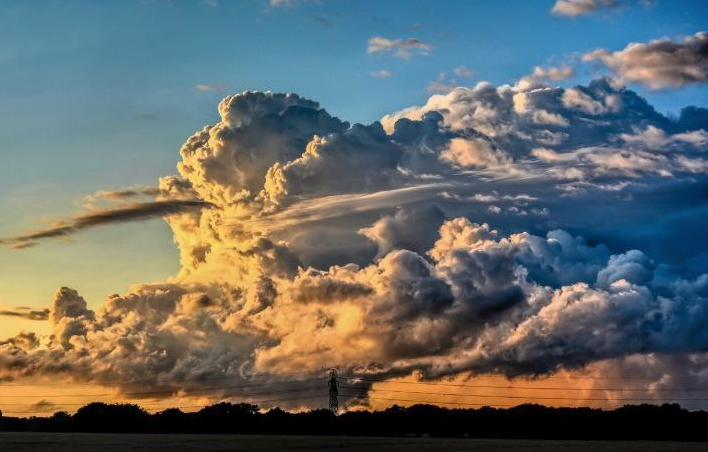

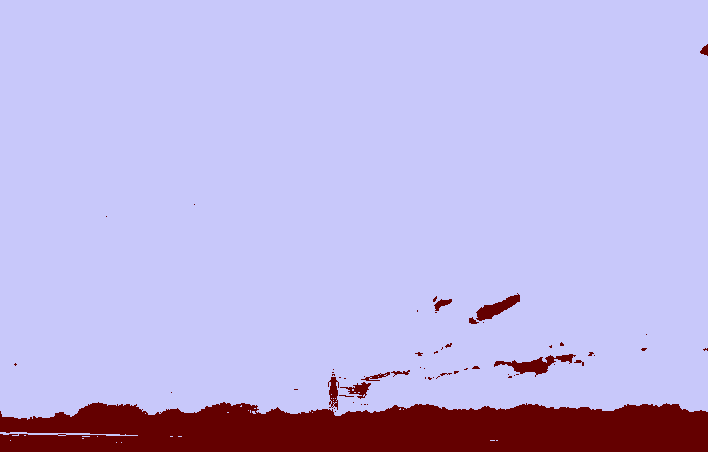

In [ ]:

img_path = "./sky7.png"
img = cv2.imread(img_path,
                 cv2.IMREAD_COLOR)
cv2_imshow( img )
thres = my_cv2_threshold(img,
                [0,10,0],
                [80,50,50])

cv2_imshow( thres )

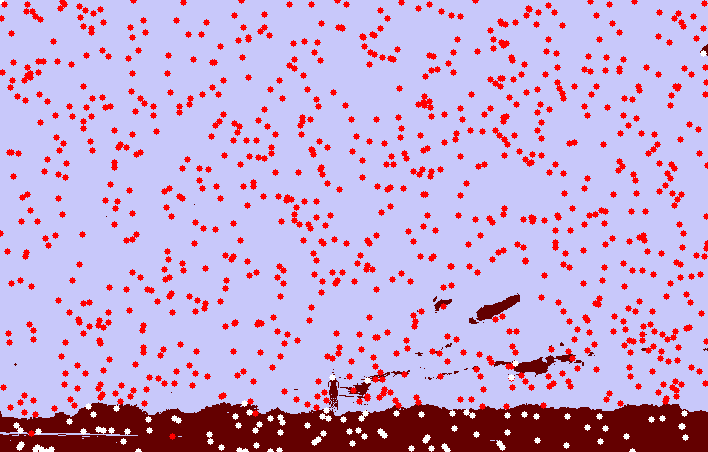

In [ ]:
n = 1000
X,Y = createData( thres , n)

for i in range(n):
    c = X[i]
    if Y[i]==0:
        thres[ int(c[0]), int(c[1]) ] = [250,250,250]
        cv2.circle(thres,
           center=( int(c[1]), int(c[0]) ),
           radius=3,
           # color BGR tuple?
           color = (255,255,255),  #-1,
           thickness=-1)
    else:
        thres[ int(c[0]), int(c[1]) ] = [0,0,0]
        cv2.circle(thres,
           center=( int(c[1]), int(c[0]) ),
           radius=3,
           # color BGR tuple?
           color = (0,0,255),  #-1,
           thickness=-1)
cv2_imshow( thres )

In [ ]:
thres.shape[0]
thres.shape[1]

708

Epoch 1/20
126/126 [==============================] - 1s 2ms/step - loss: 16.6188 - accuracy: 0.7842
Epoch 2/20
126/126 [==============================] - 0s 2ms/step - loss: 15.3884 - accuracy: 0.7942
Epoch 3/20
126/126 [==============================] - 0s 2ms/step - loss: 14.2607 - accuracy: 0.7922
Epoch 4/20
126/126 [==============================] - 0s 2ms/step - loss: 13.1154 - accuracy: 0.7922
Epoch 5/20
126/126 [==============================] - 0s 2ms/step - loss: 11.9844 - accuracy: 0.7942
Epoch 6/20
126/126 [==============================] - 0s 2ms/step - loss: 10.8211 - accuracy: 0.7922
Epoch 7/20
126/126 [==============================] - 0s 2ms/step - loss: 9.6593 - accuracy: 0.7922
Epoch 8/20
126/126 [==============================] - 0s 2ms/step - loss: 8.5020 - accuracy: 0.7942
Epoch 9/20
126/126 [==============================] - 0s 2ms/step - loss: 7.3584 - accuracy: 0.7942
Epoch 10/20
126/126 [==============================] - 0s 2ms/step - loss: 6.2292 - accuracy: 

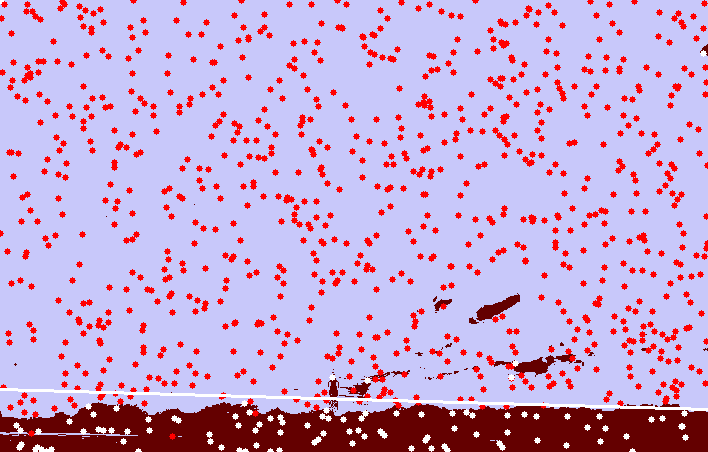

In [ ]:
myW, myb = my_get_coefs(X,Y)

myy = np.array([0, thres.shape[1] ])
myx = -(-0.5 + myW[1]*myy + myb)/myW[0]

cv2.line(thres,
         (int(myy[0]),int(myx[0])),
         (int(myy[1]),int(myx[1])),
         (255, 255, 255),
         2, 1)
cv2_imshow( thres )

In [ ]:
myy = np.array([0, thres.shape[1] ])
myx = -(-0.5 + myW[1]*myy + myb)/myW[0]

print(myx,myy)

[400.21553819 652.08142196] [  0 708]


In [ ]:
# если очень плохо, то можно тут поправить #

def my_get_coefs(X, Y):
    train_x = np.array( X )
    train_labels = np.array( Y )
    inputs = tf.keras.Input(shape=(2,))
    z = tf.keras.layers.Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid')(inputs)
    model = tf.keras.models.Model(inputs,z)

    train_x_norm = train_x-np.min(train_x) / (np.max(train_x)-np.min(train_x))

    model.compile(tf.keras.optimizers.Adam(0.001),'binary_crossentropy',['accuracy'])
    #model.summary()
    acc = 0
    acc0 = 0
    for i in range(30):
        h = model.fit(train_x_norm,train_labels,batch_size=8,epochs=20)
        _, acc = model.evaluate(train_x, train_labels)
        print("i = ",i)
        '''if acc-acc0 < .01 :
            break
        else: acc0=acc'''
        if acc > 0.98: break
    W = model.weights[0]
    b = model.weights[1]
    #plot_dataset(train_x,train_labels,W.numpy(),b.numpy())
    print("my acc = ", acc)
    #print("previous acc = ", acc0)
    return W.numpy(), b.numpy()

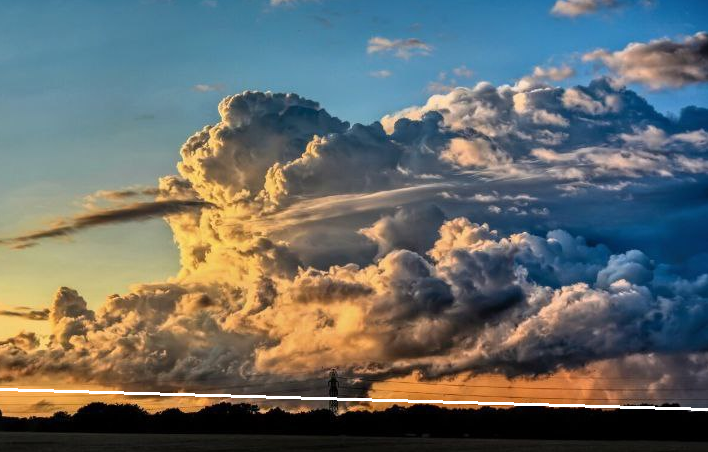

In [ ]:

img = cv2.imread(img_path,
                 cv2.IMREAD_COLOR)
cv2.line(img,
         (int(myy[0]),int(myx[0])),
         (int(myy[1]),int(myx[1])),
         (255, 255, 255),
         2, 1)
cv2_imshow( img )

# дальше всякие объедки, не надо смотреть #

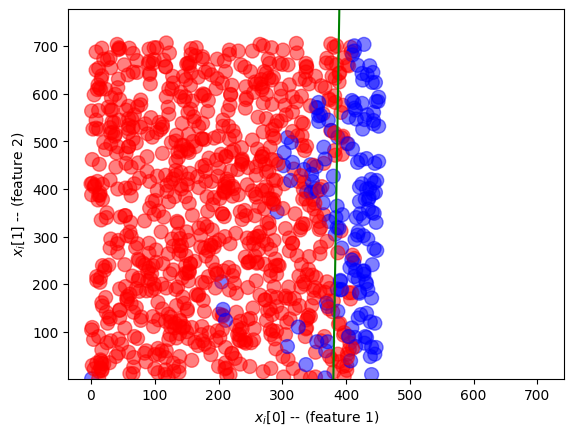

In [ ]:
plot_dataset(X,Y,myW,myb)

In [ ]:
# Загружаем изображение
#img_path = "./img_horizon.JPG"
img_path = "./sky7.png"
def myOpenFresh(image):
    image = cv2.imread(img_path,
                 #cv2.IMREAD_COLOR)
                 cv2.IMREAD_GRAYSCALE)
img = cv2.imread(img_path,
                 cv2.IMREAD_COLOR)
                 #cv2.IMREAD_GRAYSCALE)


myShow(img)
print( type(img) )

In [ ]:

img = cv2.imread(img_path,
                 cv2.IMREAD_COLOR)
                 #cv2.IMREAD_GRAYSCALE)

print( img.shape )
print( type( img.shape ) )
cY, cX, _ = img.shape
#cX //= 2 #integer devision
#cY //= 2
print( cY, cX )

(452, 708, 3)
<class 'tuple'>
452 708


In [ ]:
#cY, cX, _ = img.shape
print( img.shape )

sky_color = np.array([250,100,100])#img[cY *1//4 , cX*9//10] #sky
ground_color = np.array([0,200,0])#img[cYimg[cY *3//4 , cX*9//10] #ground

print( "sky is ", sky_color )
print( "ground is ", ground_color )
#color0 = (int( color0[0] ),int( color0[1] ),int( color0[2] ))
#color1 = (int( color1[0] ),int( color1[1] ),int( color1[2] ))

(368, 714, 3)
sky is  [250 100 100]
ground is  [  0 200   0]


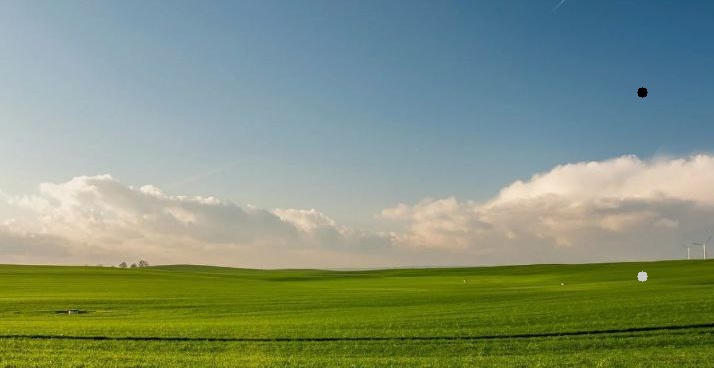

In [ ]:
buff_img = np.zeros( img.shape )
buff_img = img


black_color = (0,0,0)
white_color = (200,200,200)
#ground on sky
cv2.circle(buff_img,
           center=( 9*cX//10, 1*cY//4 ),
           radius=5,
           # color BGR tuple?
           color = black_color, #(0,0,255),  #-1,
           thickness=-1)
#sky on ground
cv2.circle(buff_img,
           center=( 9*cX//10, 3*cY//4 ),
           radius=5,
           # color BGR tuple?
           color = white_color, #(0,0,255),  #-1,
           thickness=-1)
#buff_img = np.zeros( img.shape )
myShow(img)

In [ ]:
f0 = int(feature0max * np.random.rand())# - feature0max/2
f1 = int(feature1max * np.random.rand()) #- feature1max/2
print(f0,f1)
print(thres[f0,f1])

print(white_color_BGR)
print(thres[f0,f1]==white_color_BGR)

428 42
[  0.   0. 250.]
[250   0   0]
[False  True False]


In [ ]:
#my version
n = 1000
X = np.array([[1,1]])
Y = np.array([0])

white_color_BGR = np.array([250,0,0])
black_color_BGR = np.array([0,0,250])

feature0max = thres.shape[0]
feature1max = thres.shape[1]

for i in range(n):
    f0 = int(feature0max * np.random.rand())# - feature0max/2
    f1 = int(feature1max * np.random.rand()) #- feature1max/2
    if  thres[f0,f1][0]==white_color_BGR[0]:
        dotClass = 1
    else:
        dotClass = 0
    Xi = np.array([[f0,f1]])
    Yi = np.array([ dotClass ])
    X = np.concatenate([ X,Xi ])
    Y = np.concatenate([ Y,Yi ])

#type(X) numpy.ndarray
#set specific type
X = X.astype(np.float32) #is it necessary
Y = Y.astype(np.int32)
#split it is list of indexes to separate
#n=20, split=[14,17]
#len train_x 14
#len valid_x 17-14 = 3
#len test_x  20-17 = 3
split = [ 50*n//100, (15+70)*n//100 ]
#train_x set of features (coordinates of dot)
train_x, valid_x, test_x = np.split(X, split)
#train_labels index of class
train_labels, valid_labels, test_labels = np.split(Y, split)

#print(X)
#print(Y)

In [ ]:



myShow(img)
sizeImg = img.shape[0]*img.shape[1]
grey_color = 0

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        dist2ground = myDistance(img[i,j],ground_color)
        dist2sky = myDistance(img[i,j],sky_color)
        if dist2sky < dist2ground:
            img[i,j] = white_color
        else:
            img[i,j] = black_color

myShow(img)
print(grey_color)

In [ ]:
#len on colors
def myDistance( a, b ):
    p1 = np.array(a)
    p2 = np.array(b)
    return np.linalg.norm(p1-p2)
print( color0 )
print( color1 )
print( myDistance(color1,color0) )

(234, 180, 120)
(38, 121, 99)
205.7619984350852


In [ ]:
help( cv2.circle )

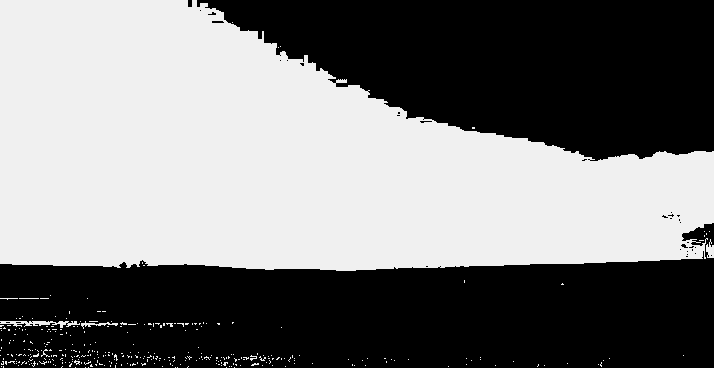

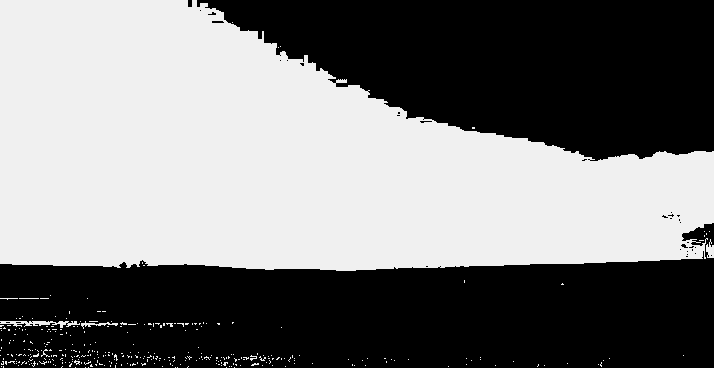

122.3447204967832


In [ ]:
#grey scale
myOpenFresh(img)
myShow(img)
sizeImg = img.shape[0]*img.shape[1]
grey_color = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        grey_color += img[i,j]/sizeImg
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] > grey_color:
            img[i,j] = 240
        else:
            img[i,j] = 0

myShow(img)
print(grey_color)

In [ ]:
img_path = "./sky7.png"
img = cv2.imread(img_path, cv2.IMREAD_COLOR) # Загружаем изображение
img = my_cv2_threshold(img,
                [0,0,0],
                [100,0,0])
output_img = "./result.png"
image = img
cv2.imwrite(output_img, image)

True

In [ ]:
img_path = "./result.png"
img = cv2.imread(img_path, cv2.IMREAD_COLOR) # Загружаем изображение



k, b = get_coefs(X, Y)
# Рисуем линию. y(0)
y_0 = int(k*0 + b)
# y(x_size)
y_m = int(k*x_size + b)
cv2.line(img, (0, 399), (x_size, y_m), (255, 255, 255), 10, 1)
cv2.line(img, (0, y_0), (x_size, y_m), (0, 0, 0), 5, 1)
#cv2.imshow("img",img)
myShow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

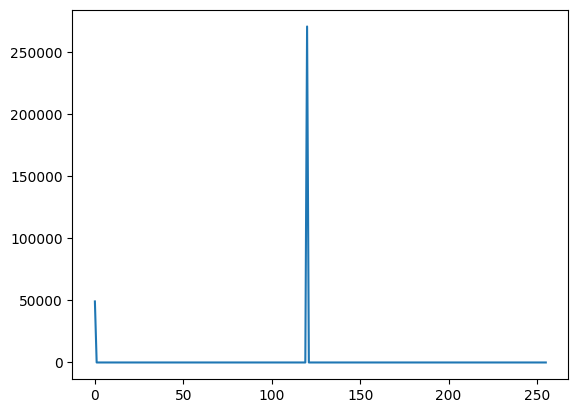

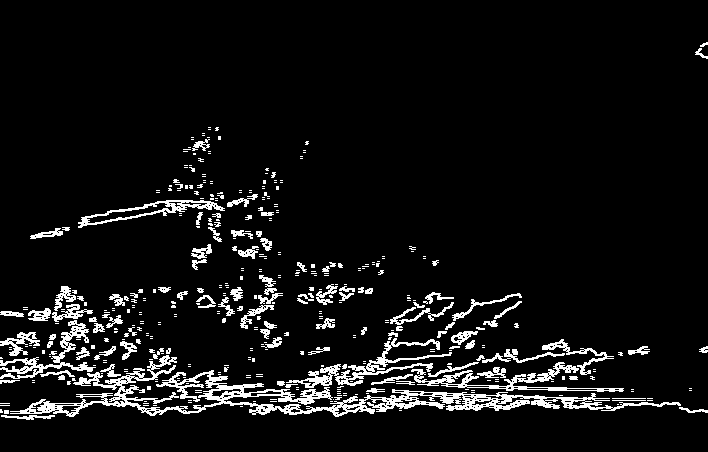

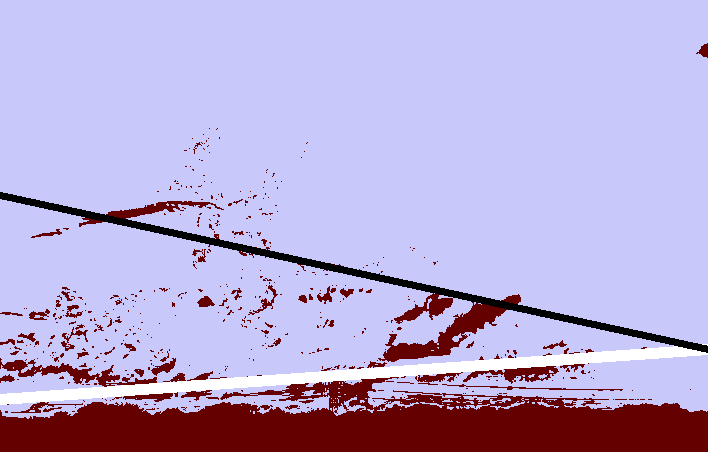

In [ ]:
img_path = "./result.png"
img = cv2.imread(img_path, cv2.IMREAD_COLOR) # Загружаем изображение


hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # Переходим в HSV
h = cv2.split(hsv)[0] # Работа с каналом H
hist = cv2.calcHist([h],[0],None,[256],[0,256],False)
x =[i for i in range(256)]
plt.plot(x,hist) # Гистограмма H канала
plt.show() # 1: 37-105; 2: 17,35,102; 3: 19, 98
thr = [72, 26, 72]
_, binary = cv2.threshold(h, thr[img_path.index(img_path)], 255, cv2.THRESH_BINARY) # Пороговое преобразование - число 72 располагается между пиков гистограммы, а на 2 картинке он ставит при этом значении линию выше облаков, поэтому там другое значение
# Gradient - Y
grad_y = cv2.Sobel(binary, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0) # Фильтр Собеля
grad_y = cv2.convertScaleAbs(grad_y)
y_size, x_size = grad_y.shape
myShow(grad_y)
X = []
Y = []
for x in range(x_size): # Выделение выборки для поиска коэффициентов
    X.append(x)
    Y.append(grad_y[:, x].argmax())
k, b = get_coefs(X, Y)
# Рисуем линию. y(0)
y_0 = int(k*0 + b)
# y(x_size)
y_m = int(k*x_size + b)
cv2.line(img, (0, 399), (x_size, y_m), (255, 255, 255), 10, 1)
cv2.line(img, (0, y_0), (x_size, y_m), (0, 0, 0), 5, 1)
#cv2.imshow("img",img)
myShow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img_path

In [ ]:
import cv2
import matplotlib.pyplot as plt

IMAGE_PATH = ["./images/photo_2023-12-01_16-23-57.jpg", "./images/photo_2023-12-01_16-24-13.jpg", "./images/photo_2023-12-01_16-24-17.jpg"]

def get_coefs(X, Y): #МНК, линейная аппроксимация
    c0 = len(X)
    c1=0
    c2=0
    b1=0
    b0=0
    for i in range (len(X)):
        c1+=X[i]
        c2+=X[i]**2
        b1+=X[i]*Y[i]
        b0+=Y[i]
    det = c0*c2 - c1*c1
    if det ==0:
        print("Det is 0!!!")
        exit(1)
    b = (b0*c2-c1*b1)/det
    k = (c0*b1-b0*c1)/det
    return k, b


if __name__ == '__main__':
    for image in IMAGE_PATH:
        img = cv2.imread(image, cv2.IMREAD_COLOR) # Загружаем изображение
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # Переходим в HSV
        h = cv2.split(hsv)[0] # Работа с каналом H
        hist = cv2.calcHist([h],[0],None,[256],[0,256],False)
        x =[i for i in range(256)]
        plt.plot(x,hist) # Гистограмма H канала
        plt.show() # 1: 37-105; 2: 17,35,102; 3: 19, 98
        thr = [72, 26, 72]
        _, binary = cv2.threshold(h, thr[IMAGE_PATH.index(image)], 255, cv2.THRESH_BINARY) # Пороговое преобразование - число 72 располагается между пиков гистограммы, а на 2 картинке он ставит при этом значении линию выше облаков, поэтому там другое значение
        # Gradient - Y
        grad_y = cv2.Sobel(binary, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0) # Фильтр Собеля
        grad_y = cv2.convertScaleAbs(grad_y)
        y_size, x_size = grad_y.shape
        X = []
        Y = []
        for x in range(x_size): # Выделение выборки для поиска коэффициентов
            X.append(x)
            Y.append(grad_y[:, x].argmax())
        k, b = get_coefs(X, Y)
        # Рисуем линию. y(0)
        y_0 = int(k*0 + b)
        # y(x_size)
        y_m = int(k*x_size + b)
        cv2.line(img, (0, y_0), (x_size, y_m), (255, 255, 255), 10, 1)
        cv2.imshow("img",img)
        cv2.waitKey(0)
    cv2.destroyAllWindows()